In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
bank=pd.read_csv("C:/Users/Admin/Desktop/ds/bank-full.csv",sep=';')

In [4]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
bank.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
print(bank.shape)

(45211, 17)


In [7]:
print(list(bank.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


# barplot for y

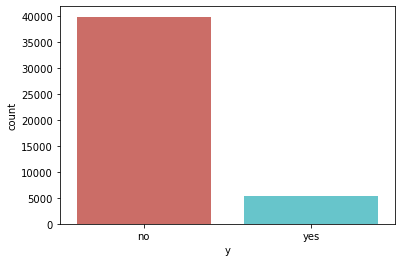

In [8]:
sns.countplot(x='y',data=bank, palette='hls')
plt.show()

In [9]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Customer job distribution

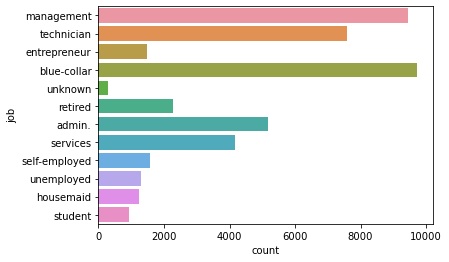

In [10]:
sns.countplot(y="job", data=bank)
plt.show()

# customer marital status dstribution

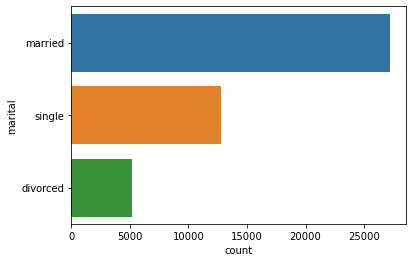

In [11]:
sns.countplot(y="marital", data=bank)
plt.show()

# credit in default

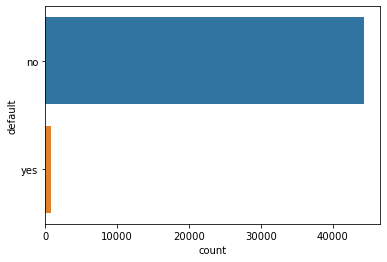

In [12]:
sns.countplot(y="default", data=bank)
plt.show()

# housing loan

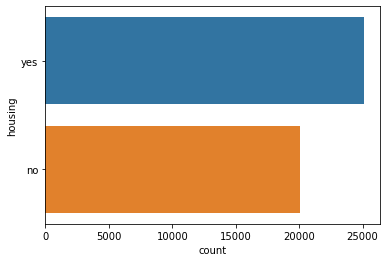

In [13]:
sns.countplot(y="housing", data=bank)
plt.show()

# personal loan

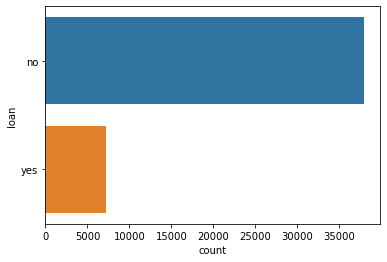

In [14]:
sns.countplot(y="loan", data=bank)
plt.show()

# Barplot for previous marketing campaign outcome

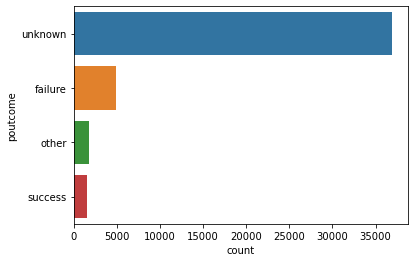

In [15]:
sns.countplot(y="poutcome", data=bank)
plt.show()

In [16]:
bank.drop(bank.columns[[0,3,5,8,9,10,11,12,13,14]],axis=1)

,job,marital,default,housing,loan,poutcome,y
0,management,married,no,yes,no,unknown,no
1,technician,single,no,yes,no,unknown,no
2,entrepreneur,married,no,yes,yes,unknown,no
3,blue-collar,married,no,yes,no,unknown,no
4,unknown,single,no,no,no,unknown,no
...,...,...,...,...,...,...,...
45206,technician,married,no,no,no,unknown,yes
45207,retired,divorced,no,no,no,unknown,yes
45208,retired,married,no,no,no,success,yes
45209,blue-collar,married,no,no,no,unknown,no


In [17]:
bank2 = pd.get_dummies(bank, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome','y'])

In [18]:
 bank2

,age,education,balance,contact,day,month,duration,campaign,pdays,previous,...,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,tertiary,2143,unknown,5,may,261,1,-1,0,...,0,1,1,0,0,0,0,1,1,0
1,44,secondary,29,unknown,5,may,151,1,-1,0,...,0,1,1,0,0,0,0,1,1,0
2,33,secondary,2,unknown,5,may,76,1,-1,0,...,0,1,0,1,0,0,0,1,1,0
3,47,unknown,1506,unknown,5,may,92,1,-1,0,...,0,1,1,0,0,0,0,1,1,0
4,33,unknown,1,unknown,5,may,198,1,-1,0,...,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,825,cellular,17,nov,977,3,-1,0,...,1,0,1,0,0,0,0,1,0,1
45207,71,primary,1729,cellular,17,nov,456,2,-1,0,...,1,0,1,0,0,0,0,1,0,1
45208,72,secondary,5715,cellular,17,nov,1127,5,184,3,...,1,0,1,0,0,0,1,0,0,1
45209,57,secondary,668,telephone,17,nov,508,4,-1,0,...,1,0,1,0,0,0,0,1,1,0


In [19]:
bank2.drop(bank2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
bank2.columns

Index(['age', 'education', 'balance', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_housemaid', 'job_management', 'job_retired', 'job_services',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_no',
       'y_yes'],
      dtype='object')

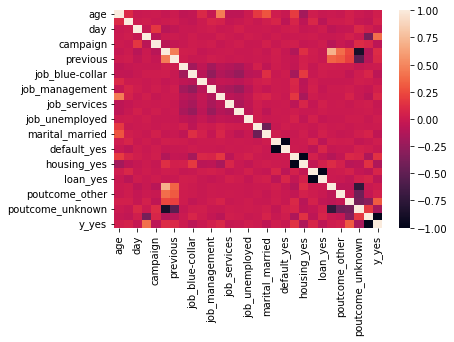

In [20]:
sns.heatmap(bank2.corr())
plt.show()

In [38]:
bank2

,age,education,balance,contact,day,month,duration,campaign,pdays,previous,...,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,tertiary,2143,unknown,5,may,261,1,-1,0,...,0,1,1,0,0,0,0,1,1,0
1,44,secondary,29,unknown,5,may,151,1,-1,0,...,0,1,1,0,0,0,0,1,1,0
2,33,secondary,2,unknown,5,may,76,1,-1,0,...,0,1,0,1,0,0,0,1,1,0
3,47,unknown,1506,unknown,5,may,92,1,-1,0,...,0,1,1,0,0,0,0,1,1,0
4,33,unknown,1,unknown,5,may,198,1,-1,0,...,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,825,cellular,17,nov,977,3,-1,0,...,1,0,1,0,0,0,0,1,0,1
45207,71,primary,1729,cellular,17,nov,456,2,-1,0,...,1,0,1,0,0,0,0,1,0,1
45208,72,secondary,5715,cellular,17,nov,1127,5,184,3,...,1,0,1,0,0,0,1,0,0,1
45209,57,secondary,668,telephone,17,nov,508,4,-1,0,...,1,0,1,0,0,0,0,1,1,0


In [39]:
X = bank2.iloc[:,11:]
Y = bank2.iloc[:,30:]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
X_train.shape

(33908, 21)

In [41]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# confusion matrix

In [42]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9439  520]
 [ 464  880]]


In [43]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [44]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: job_admin., Length: 45211, dtype: uint8

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y,y_pred)

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

ValueError: multilabel-indicator format is not supported